<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Collura  
<b> Student 2:</b> Spano
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

$u_3^{(1)} = 0.8 \cdot 0.3 + 0.2 \cdot 0.8 + 1 \cdot 0.2 = 0.6$

$u_4^{(1)} = 0.8 \cdot 0.5 + 0.2 \cdot 0.2 + 1 \cdot -0.4 = -0.76$

$o_3^{(1)} = sig(u_3^{(1)}) = 0.6456$

$o_4^{(1)} = sig(u_4^{(1)}) = 0.3186$

$u_5^{(2)} = 0.6456 \cdot -0.6 + 0.3186 \cdot 0.4 + 1 \cdot 0.5 = 0.2400$

$o_5^{(2)} = sig(u_5^{(2)}) = 0.559 = y$

$E = \frac{1}{2} \sum_k (y_k - t_k)^2 = \frac{1}{2} (0.59 - 0.4)^2 = 0.019$


$w_{1,3}= 0.3 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot -0.6] \cdot 0.64 \cdot (1-0.64) \cdot 0.8 = 0.3043$ 

$w_{1,4}= -0.5 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot 0.4] \cdot 0.32 \cdot (1-0.32) \cdot 0.8 = -0.5027$

$w_{2,3}= 0.8 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot -0.6] \cdot 0.64 \cdot (1-0.64) \cdot 0.2 = 0.8011$

$w_{2,4}= 0.2 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot 0.4] \cdot 0.32 \cdot (1-0.32) \cdot 0.2 = 0.1993$

$w_{6,3}= 0.2 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot -0.6] \cdot 0.64 \cdot (1-0.64) \cdot 1 = 0.2054$

$w_{6,4}= -0.4 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot 0.4] \cdot 0.32 \cdot (1-0.32) \cdot 1 = -0.4034$

$w_{3,5}= -0.6 - \mu \cdot (0.59-0.4)\cdot 0.59 \cdot (1-0.59)\cdot 0.64 = -0.6254$

$w_{4,5}= 0.4 - \mu \cdot (0.59-0.4)\cdot 0.59 \cdot (1-0.59)\cdot 0.32 = 0.3874$

$w_{7,5}= 0.5 - \mu \cdot (0.59-0.4)\cdot 0.59 \cdot (1-0.59)\cdot 1 = 0.4606$

In [147]:
import pandas as pd

nn = pd.read_csv('neural_network.csv', dtype=str, na_filter=False)
nn

,xi,w_input_hidden,a_hidden,o_hidden,w_hidden_output,a_output,output,Y
0,0.8,0.3,0.6,0.645656306225795,-0.6,0.240064722748913,0.559729599109578,0.4
1,0.2,-0.5,-0.76,0.318646266210974,0.4,,,
2,1,0.8,,1,0.5,,,
3,,0.2,,,,,,
4,,0.2,,,,,,
5,,-0.4,,,,,,
6,,,,,,,,
7,learning rate,1,,,,,,
8,dEdu2,0.039362544464807,,,,,,
9,dEdu1_0,-0.005403317902693,,,,,,


<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [148]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from NeuralNetwork import *

#create the network
my_first_net = NeuralNetwork(2, 2, 1, iterations=10, learning_rate=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# Data preparation 
X = np.array([0.8, 0.2])
Y = np.array([0.4])
data = []
data.append(X)
data.append(Y)

# initialize weights
wi = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
wo = np.array([[-0.6], [0.4], [0.5]])
my_first_net.weights_initialisation(wi, wo)

print("Weight input to hidden\n", my_first_net.W_input_to_hidden)
print("Weight hidden to output\n", my_first_net.W_hidden_to_output)

Weight input to hidden
 [[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
Weight hidden to output
 [[-0.6]
 [ 0.4]
 [ 0.5]]


<b>Question 1.2.2</b>: Implement the Feed Forward function (`feed_forward(X)` in the `NeuralNetwork.py` file)

```python
def feed_forward(self, inputs):
    # Compute input activations
    self.a_input = np.array(inputs)
    if len(inputs) < self.input:
        self.a_input = np.append(self.a_input, 1)
    self.a_input = np.atleast_2d(self.a_input)

    # Compute hidden activations
    self.a_hidden = self.a_input.dot(self.W_input_to_hidden)
    self.o_hidden = sigmoid(self.a_hidden)
    if len(self.o_hidden) < self.hidden:
        self.o_hidden = np.append(self.o_hidden, 1)
    self.o_hidden = np.atleast_2d(self.o_hidden)

    # Compute output activations
    self.a_output = self.o_hidden.dot(self.W_hidden_to_output)
    self.output = sigmoid(self.a_output)
    return self.output
```

Check your network outputs the expected value (the one you computed in question 1.1)

In [150]:
# test my Feed Forward function 
output_activation = my_first_net.feed_forward(X)
print('Output activation =', output_activation)

Output activation = [[ 0.5597296]]


<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (`back_propagate(Y)` in the `NeuralNetwork.py` file)  

```python
def back_propagate(self, targets):
    # Calculate error terms for output
    dEdu2 = (self.output - targets).dot(np.multiply(self.output, 1 - self.output))
    dEdu2 = np.atleast_2d(dEdu2)

    # Calculate error terms for hidden
    dEdu1 = np.multiply(dEdu2.dot(self.W_hidden_to_output.T), np.multiply(self.o_hidden, 1 - self.o_hidden))
    dEdu1 = np.atleast_2d(np.delete(dEdu1, -1))

    # Update output weights
    self.W_hidden_to_output -= self.learning_rate * (dEdu2.T.dot(self.o_hidden)).T

    # Update input weights
    self.W_input_to_hidden -= self.learning_rate * (dEdu1.T.dot(self.a_input)).T

    # Calculate error
    return 0.5 * sum((self.output - targets)**2)
```

Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [151]:
# Test back-propagation function
my_first_net.back_propagate(Y)

# Print weights after back-propagation
print('wi_new =\n', my_first_net.W_input_to_hidden)
print('wo_new =\n', my_first_net.W_hidden_to_output)

print('Error =', err)

wi_new =
 [[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]
wo_new =
 [[-0.62541468]
 [ 0.38745727]
 [ 0.46063746]]
Error = [ 0.00011692]


In [152]:
print(my_first_net.o_hidden.shape)

(1, 3)


Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [125]:
from utils import *
training_data, validation_data, test_data = load_data()

Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

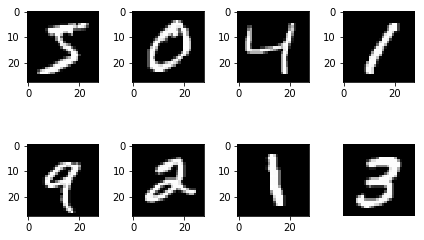

In [126]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [127]:
# Create the network
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784, 30, 10, iterations = 10, learning_rate = 0.1)

<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [128]:
test_accuracy = my_mnist_net.predict(test_data) / 100
print('Test_Accuracy  %-2.2f' % test_accuracy)

# FIXME: Should I add anything here?

Test_Accuracy  8.79


<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

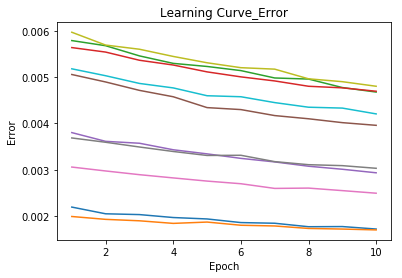

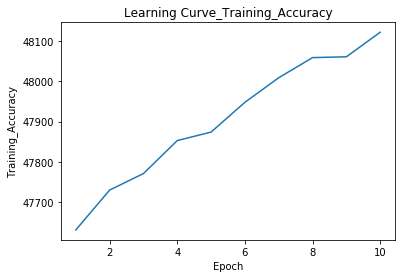

In [133]:
# Train your network 
my_mnist_net.train(training_data, validation_data)

# Save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
# FIXME: Should I add anything here?

#Note your observations here. 

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


In [146]:
# Your implementation goes here
my_mnist_net.predict(test_data)

9480.0

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

In [ ]:
#Your implementation with a learning rate of 0.001 goes here 
















In [ ]:
#Your implementation with a learning rate of 1.0 goes here 



















In [ ]:
#Your implementation with a learning rate of 10 goes here 





















#Your answer for Question 2.2.1 goes here

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

In [ ]:
#Your implementation goes here

















#Your answer goes here

<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

In [ ]:
#Your implementation goes here

















#Your answer goes here


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

In [ ]:
#Your implementation goes here
























#Your answer goes here

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



In [ ]:
#Your implementation goes here

















#Your answer goes here